In [2]:
import pandas as pd


df = pd.read_csv("raw tutorial.csv", delimiter = ';')
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.000000
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,1.925293
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,2.134766


In [3]:
columns_to_keep = [col for col in df.columns if col not in ['product', 'timestamp']]

# Pivot the DataFrame
df_pivoted = df.pivot_table(index='timestamp', columns='product', values=columns_to_keep, aggfunc='mean')

# Combine the level names with the product names
df_pivoted.columns = ['_'.join(col).strip() for col in df_pivoted.columns.values]

# Reset the index if you want 'timestamp' back as a column
df_pivoted.reset_index(inplace=True)

# Display the head of the pivoted DataFrame
df_pivoted

,timestamp,ask_price_1_AMETHYSTS,ask_price_1_STARFRUIT,ask_price_2_AMETHYSTS,ask_price_2_STARFRUIT,ask_price_3_AMETHYSTS,ask_price_3_STARFRUIT,ask_volume_1_AMETHYSTS,ask_volume_1_STARFRUIT,ask_volume_2_AMETHYSTS,...,bid_volume_2_AMETHYSTS,bid_volume_2_STARFRUIT,bid_volume_3_AMETHYSTS,bid_volume_3_STARFRUIT,day_AMETHYSTS,day_STARFRUIT,mid_price_AMETHYSTS,mid_price_STARFRUIT,profit_and_loss_AMETHYSTS,profit_and_loss_STARFRUIT
0,0,10004.0,5003.0,10005.0,NaN,NaN,NaN,2.0,31.0,29.0,...,2.0,31.0,29.0,NaN,-2.0,-2.0,10003.0,5002.5,0.0,0.000000
1,100,10004.0,5003.0,10005.0,5004.0,NaN,NaN,2.0,2.0,22.0,...,22.0,NaN,NaN,NaN,-2.0,-2.0,10000.0,5000.0,2.0,1.925293
2,200,10005.0,5003.0,NaN,NaN,NaN,NaN,20.0,20.0,NaN,...,NaN,20.0,NaN,NaN,-2.0,-2.0,10000.0,5000.0,-6.0,2.134766
3,300,10004.0,5003.0,10005.0,NaN,NaN,NaN,2.0,31.0,29.0,...,29.0,NaN,NaN,NaN,-2.0,-2.0,10000.0,4999.5,-6.0,-3.100586
4,400,10004.0,5002.0,10005.0,NaN,NaN,NaN,2.0,27.0,25.0,...,25.0,NaN,NaN,NaN,-2.0,-2.0,10000.0,4998.5,-14.0,-0.179688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,199500,10004.0,4956.0,10005.0,NaN,NaN,NaN,1.0,23.0,22.0,...,1.0,NaN,22.0,NaN,-2.0,-2.0,10003.0,4952.5,-48.0,908.226562
1996,199600,10002.0,4956.0,10004.0,NaN,10005.0,NaN,7.0,22.0,1.0,...,21.0,NaN,NaN,NaN,-2.0,-2.0,9999.0,4952.5,-48.0,911.500000
1997,199700,10004.0,4956.0,10005.0,NaN,NaN,NaN,2.0,27.0,25.0,...,2.0,NaN,25.0,NaN,-2.0,-2.0,10001.0,4952.5,-48.0,910.929688
1998,199800,10002.0,4956.0,10005.0,NaN,NaN,NaN,8.0,21.0,21.0,...,NaN,NaN,NaN,NaN,-2.0,-2.0,9998.5,4952.5,-48.0,904.429688


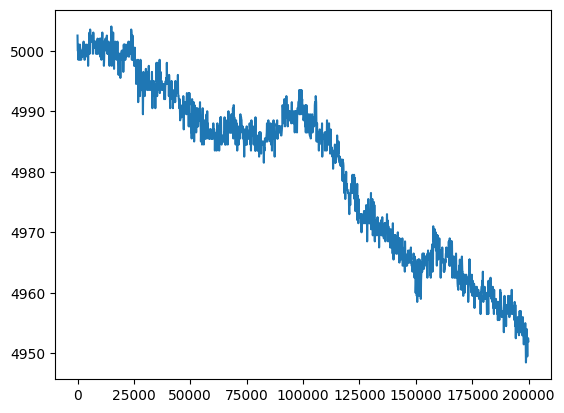

In [4]:
import matplotlib.pyplot as plt
plt.plot(df_pivoted['timestamp'], df_pivoted['mid_price_STARFRUIT'], label='mid_price_STARFRUIT')

In [5]:
y = df_pivoted[["timestamp","mid_price_STARFRUIT"]]
mid_price_sf_nacheck = y['mid_price_STARFRUIT'].isna().sum()

print(f"Number of NA values in column '{'mid_price_STARFRUIT'}': {mid_price_sf_nacheck}")

Number of NA values in column 'mid_price_STARFRUIT': 0


In [6]:
y.set_index("timestamp", inplace = True)
y

,mid_price_STARFRUIT
timestamp,
0,5002.5
100,5000.0
200,5000.0
300,4999.5
400,4998.5
...,...
199500,4952.5
199600,4952.5
199700,4952.5


<Axes: xlabel='timestamp'>

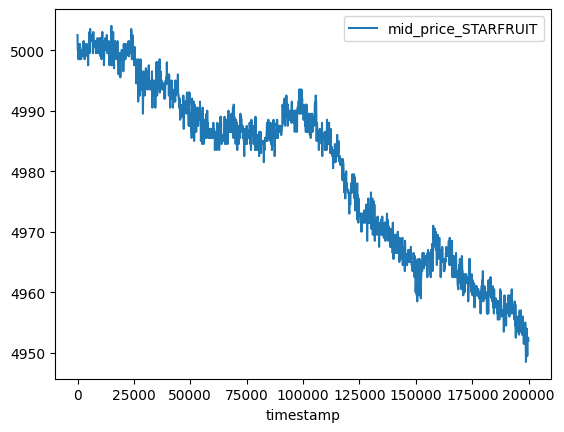

In [7]:
y.plot()

<Axes: xlabel='timestamp'>

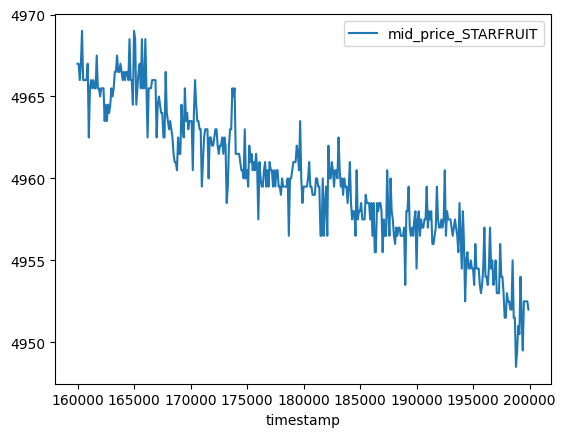

In [8]:
y.loc["160000":].plot()

In [9]:
import numpy as np
y['returns'] = np.log(y.div(y.shift(1))) # log return better than simple return in approximating actual return
y

C:\Users\HP\AppData\Local\Temp\ipykernel_59996\2903634543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['returns'] = np.log(y.div(y.shift(1)))


,mid_price_STARFRUIT,returns
timestamp,,
0,5002.5,NaN
100,5000.0,-0.000500
200,5000.0,0.000000
300,4999.5,-0.000100
400,4998.5,-0.000200
...,...,...
199500,4952.5,0.000606
199600,4952.5,0.000000
199700,4952.5,0.000000


## Define Bollinger Band

C:\Users\HP\AppData\Local\Temp\ipykernel_59996\3164604177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["SMA"] = y["mid_price_STARFRUIT"].rolling(SMA).mean()


<Axes: xlabel='timestamp'>

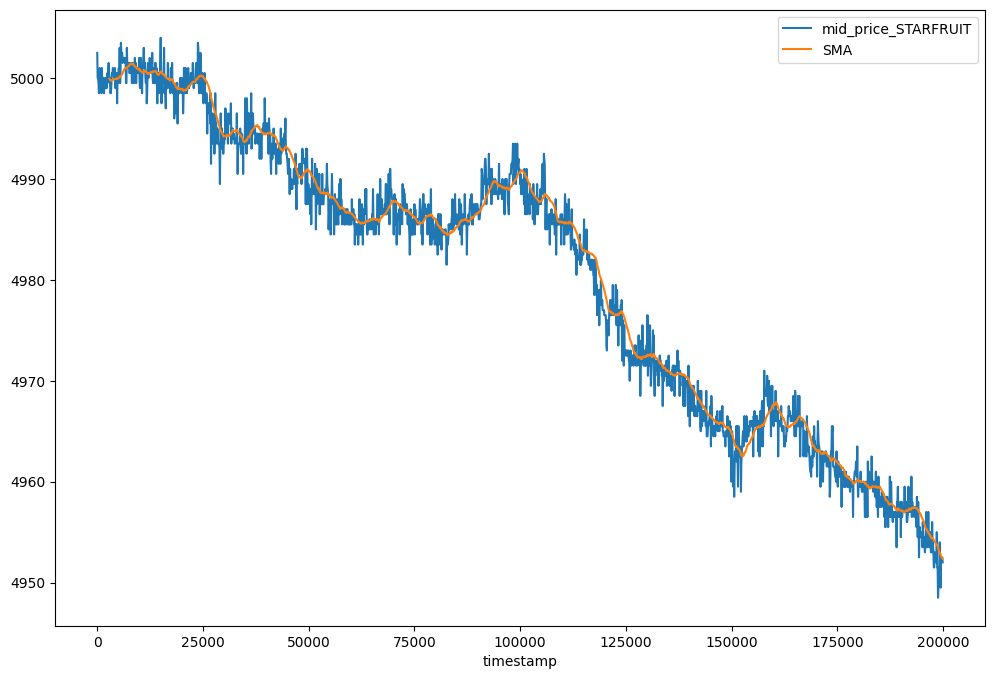

In [10]:
SMA = 30
dev = 2

y["SMA"] = y["mid_price_STARFRUIT"].rolling(SMA).mean()
y[["mid_price_STARFRUIT", "SMA"]].plot(figsize=(12,8))

<Axes: xlabel='timestamp'>

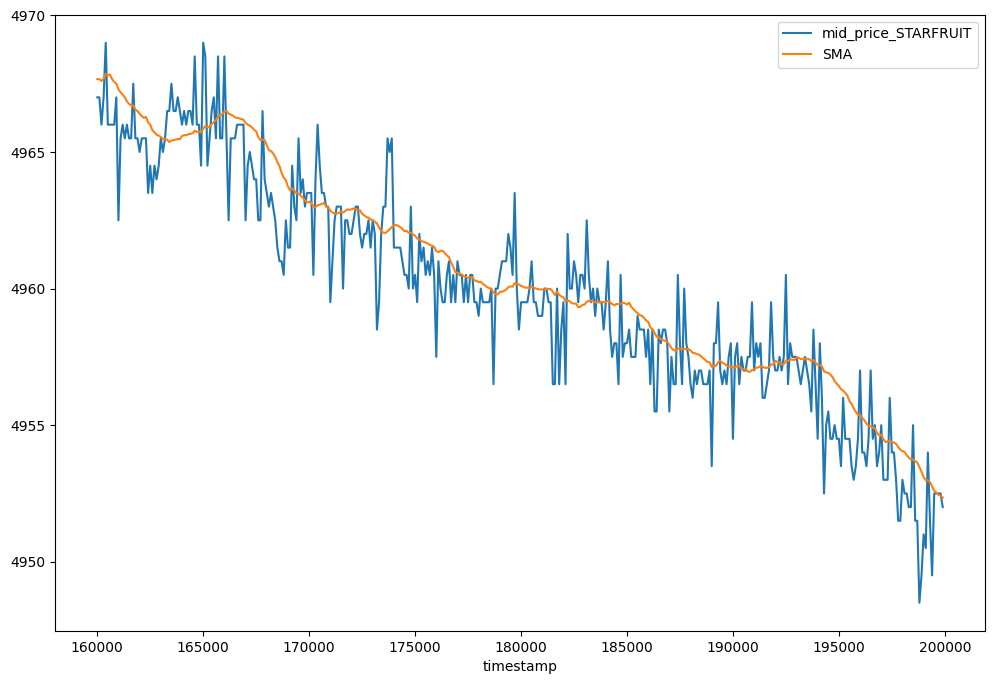

In [11]:
y.loc["160000":, ["mid_price_STARFRUIT", "SMA"]].plot(figsize = (12, 8))

<Axes: xlabel='timestamp'>

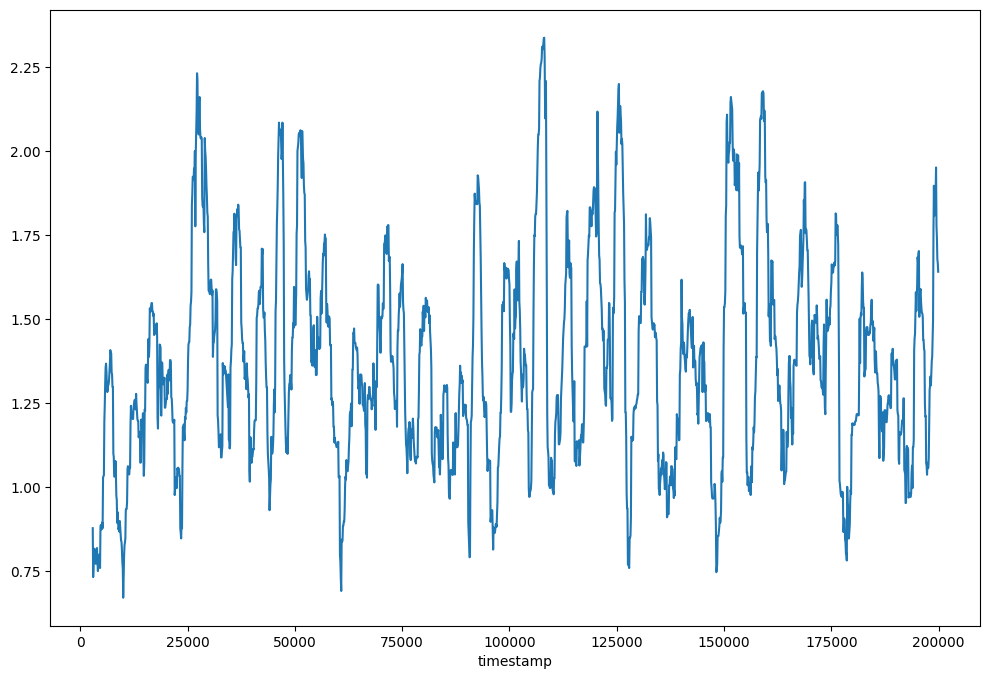

In [12]:
y["mid_price_STARFRUIT"].rolling(SMA).std()
y["mid_price_STARFRUIT"].rolling(SMA).std().plot(figsize = (12, 8 ))

C:\Users\HP\AppData\Local\Temp\ipykernel_59996\940201758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Lower"] = y["SMA"] - y["mid_price_STARFRUIT"].rolling(SMA).std() * dev # Lower Band -2 Std
C:\Users\HP\AppData\Local\Temp\ipykernel_59996\940201758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Upper"] = y["SMA"] + y["mid_price_STARFRUIT"].rolling(SMA).std() * dev # Upper Band -2 Std Dev


<Axes: xlabel='timestamp'>

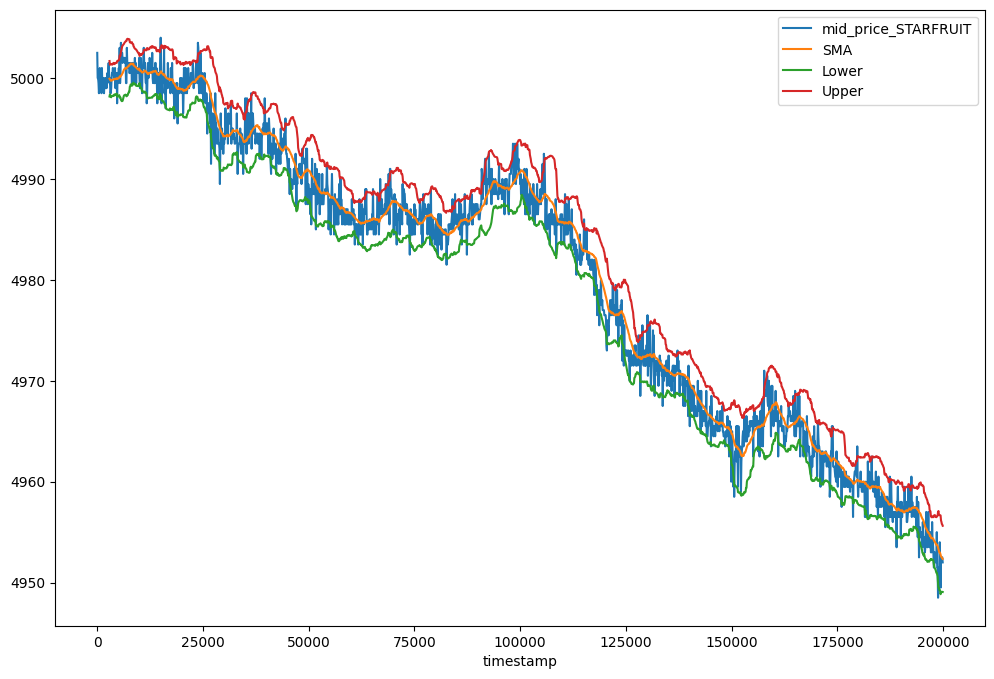

In [13]:
y["Lower"] = y["SMA"] - y["mid_price_STARFRUIT"].rolling(SMA).std() * dev # Lower Band -2 Std 
y["Upper"] = y["SMA"] + y["mid_price_STARFRUIT"].rolling(SMA).std() * dev # Upper Band -2 Std Dev
y.drop(columns = "returns").plot(figsize = (12, 8))

In [14]:
y.dropna(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_59996\455453432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(inplace=True)


In [15]:
y

,mid_price_STARFRUIT,returns,SMA,Lower,Upper
timestamp,,,,,
2900,4999.5,-0.000200,4999.933333,4998.176900,5001.689767
3000,5000.0,0.000100,4999.850000,4998.384300,5001.315700
3100,4998.5,-0.000300,4999.800000,4998.255265,5001.344735
3200,4998.5,0.000000,4999.750000,4998.136480,5001.363520
3300,4999.0,0.000100,4999.733333,4998.098933,5001.367734
...,...,...,...,...,...
199500,4952.5,0.000606,4952.600000,4949.043559,4956.156441
199600,4952.5,0.000000,4952.533333,4949.050040,4956.016627
199700,4952.5,0.000000,4952.450000,4949.093586,4955.806414


In [32]:
y["distance"] = y.mid_price_STARFRUIT - y.SMA
y["position"] = np.where(y.mid_price_STARFRUIT < y.Lower, 1, np.nan) # oversold -> go long
y["position"] = np.where(y.mid_price_STARFRUIT > y.Upper, -1, y["position"]) # overbought -> go short
y["position"] = np.where(y.distance * y.distance.shift(1) < 0, 0, y["position"]) # crossing SMA ("Middle Band") -> go neutral
y

C:\Users\HP\AppData\Local\Temp\ipykernel_59996\3990227320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["distance"] = y.mid_price_STARFRUIT - y.SMA
C:\Users\HP\AppData\Local\Temp\ipykernel_59996\3990227320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["position"] = np.where(y.mid_price_STARFRUIT < y.Lower, 1, np.nan) # oversold -> go long
C:\Users\HP\AppData\Local\Temp\ipykernel_59996\3990227320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,mid_price_STARFRUIT,returns,SMA,Lower,Upper,distance,position,strategy,c_returns,c_strategy,trades,strategy_net,c_strategy_net
timestamp,,,,,,,,,,,,,
3000,5000.0,0.000100,4999.850000,4998.384300,5001.315700,0.150000,NaN,0.0,1.000100,1.000000,0.0,0.0,1.000000
3100,4998.5,-0.000300,4999.800000,4998.255265,5001.344735,-1.300000,0.0,-0.0,0.999800,1.000000,0.0,-0.0,1.000000
3200,4998.5,0.000000,4999.750000,4998.136480,5001.363520,-1.250000,NaN,0.0,0.999800,1.000000,0.0,0.0,1.000000
3300,4999.0,0.000100,4999.733333,4998.098933,5001.367734,-0.733333,NaN,0.0,0.999900,1.000000,0.0,0.0,1.000000
3400,5000.0,0.000200,4999.783333,4998.214602,5001.352065,0.216667,0.0,0.0,1.000100,1.000000,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199500,4952.5,0.000606,4952.600000,4949.043559,4956.156441,-0.100000,NaN,0.0,0.990599,1.067204,0.0,0.0,1.054727
199600,4952.5,0.000000,4952.533333,4949.050040,4956.016627,-0.033333,NaN,0.0,0.990599,1.067204,0.0,0.0,1.054727
199700,4952.5,0.000000,4952.450000,4949.093586,4955.806414,0.050000,0.0,0.0,0.990599,1.067204,0.0,0.0,1.054727


In [18]:
y["position"] = y.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position
y

C:\Users\HP\AppData\Local\Temp\ipykernel_59996\1527778356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["position"] = y.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position


,mid_price_STARFRUIT,returns,SMA,Lower,Upper,distance,position
timestamp,,,,,,,
2900,4999.5,-0.000200,4999.933333,4998.176900,5001.689767,-0.433333,0.0
3000,5000.0,0.000100,4999.850000,4998.384300,5001.315700,0.150000,0.0
3100,4998.5,-0.000300,4999.800000,4998.255265,5001.344735,-1.300000,0.0
3200,4998.5,0.000000,4999.750000,4998.136480,5001.363520,-1.250000,0.0
3300,4999.0,0.000100,4999.733333,4998.098933,5001.367734,-0.733333,0.0
...,...,...,...,...,...,...,...
199500,4952.5,0.000606,4952.600000,4949.043559,4956.156441,-0.100000,0.0
199600,4952.5,0.000000,4952.533333,4949.050040,4956.016627,-0.033333,0.0
199700,4952.5,0.000000,4952.450000,4949.093586,4955.806414,0.050000,0.0


In [19]:
y['position'].value_counts()

position
 0.0    1486
 1.0     306
-1.0     179
Name: count, dtype: int64

<Axes: xlabel='timestamp'>

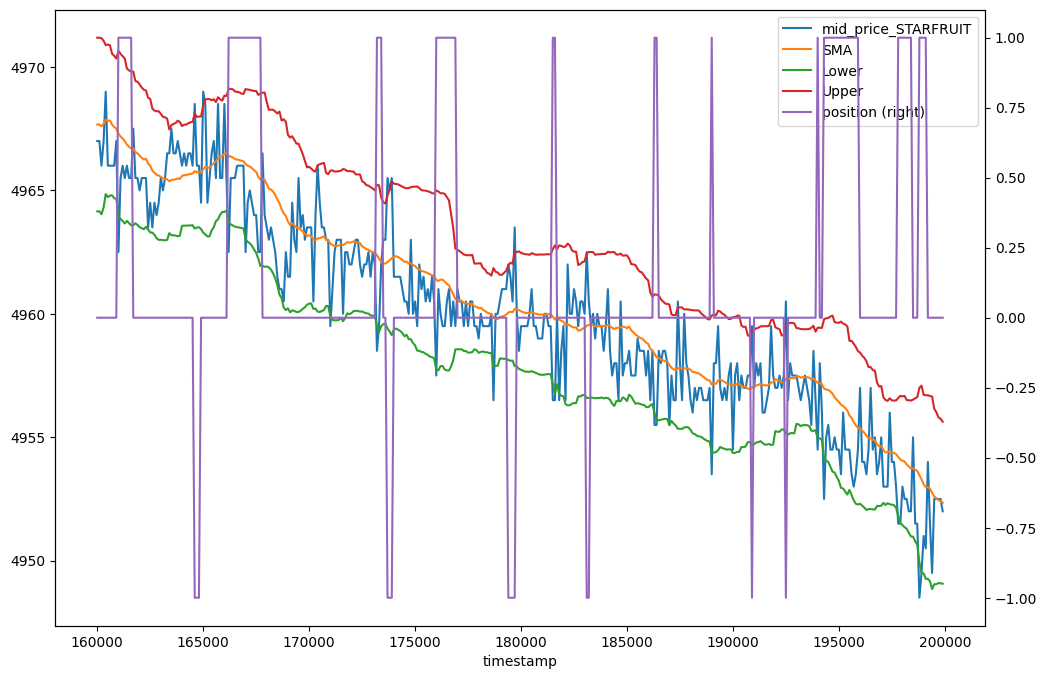

In [20]:
y.drop(columns = ["returns", "distance"]).loc["160000":].plot(figsize = (12, 8), secondary_y = "position")

<Axes: xlabel='timestamp'>

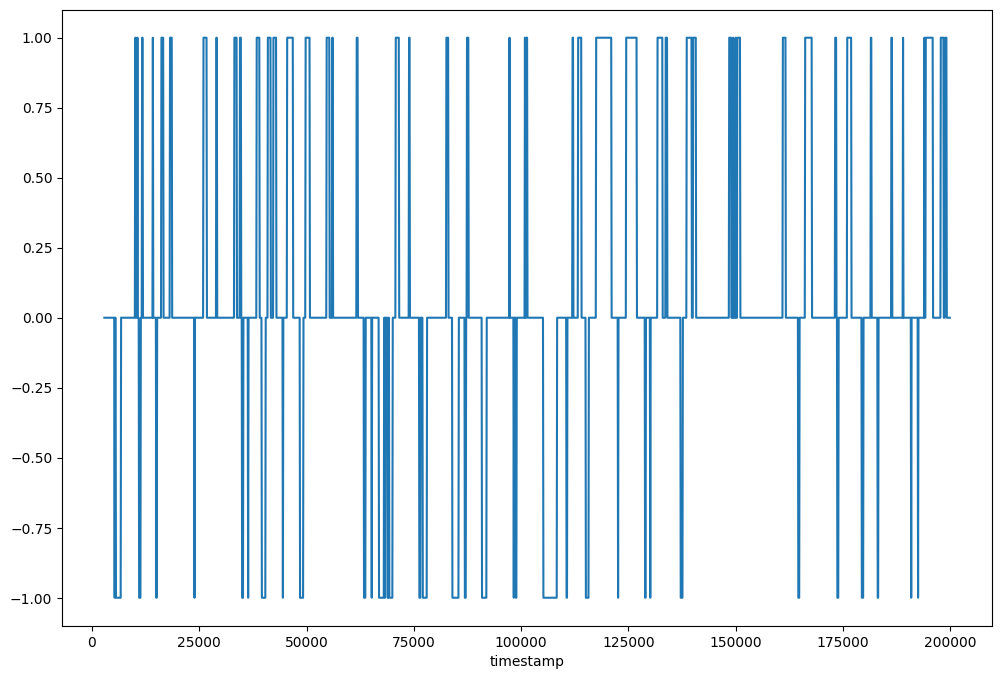

In [21]:
y.position.plot(figsize = (12, 8))

## Vectorized Backtesting

In [22]:
y

,mid_price_STARFRUIT,returns,SMA,Lower,Upper,distance,position
timestamp,,,,,,,
2900,4999.5,-0.000200,4999.933333,4998.176900,5001.689767,-0.433333,0.0
3000,5000.0,0.000100,4999.850000,4998.384300,5001.315700,0.150000,0.0
3100,4998.5,-0.000300,4999.800000,4998.255265,5001.344735,-1.300000,0.0
3200,4998.5,0.000000,4999.750000,4998.136480,5001.363520,-1.250000,0.0
3300,4999.0,0.000100,4999.733333,4998.098933,5001.367734,-0.733333,0.0
...,...,...,...,...,...,...,...
199500,4952.5,0.000606,4952.600000,4949.043559,4956.156441,-0.100000,0.0
199600,4952.5,0.000000,4952.533333,4949.050040,4956.016627,-0.033333,0.0
199700,4952.5,0.000000,4952.450000,4949.093586,4955.806414,0.050000,0.0


In [23]:
y["strategy"] = y.position.shift(1) * y["returns"]
y.dropna(inplace = True)
y

C:\Users\HP\AppData\Local\Temp\ipykernel_59996\1861699959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["strategy"] = y.position.shift(1) * y["returns"]
C:\Users\HP\AppData\Local\Temp\ipykernel_59996\1861699959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(inplace = True)


,mid_price_STARFRUIT,returns,SMA,Lower,Upper,distance,position,strategy
timestamp,,,,,,,,
3000,5000.0,0.000100,4999.850000,4998.384300,5001.315700,0.150000,0.0,0.0
3100,4998.5,-0.000300,4999.800000,4998.255265,5001.344735,-1.300000,0.0,-0.0
3200,4998.5,0.000000,4999.750000,4998.136480,5001.363520,-1.250000,0.0,0.0
3300,4999.0,0.000100,4999.733333,4998.098933,5001.367734,-0.733333,0.0,0.0
3400,5000.0,0.000200,4999.783333,4998.214602,5001.352065,0.216667,0.0,0.0
...,...,...,...,...,...,...,...,...
199500,4952.5,0.000606,4952.600000,4949.043559,4956.156441,-0.100000,0.0,0.0
199600,4952.5,0.000000,4952.533333,4949.050040,4956.016627,-0.033333,0.0,0.0
199700,4952.5,0.000000,4952.450000,4949.093586,4955.806414,0.050000,0.0,0.0


In [24]:
y["c_returns"] = y["returns"].cumsum().apply(np.exp)
y["c_strategy"] = y["strategy"].cumsum().apply(np.exp)

C:\Users\HP\AppData\Local\Temp\ipykernel_59996\2257898324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["c_returns"] = y["returns"].cumsum().apply(np.exp)
C:\Users\HP\AppData\Local\Temp\ipykernel_59996\2257898324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["c_strategy"] = y["strategy"].cumsum().apply(np.exp)


<Axes: xlabel='timestamp'>

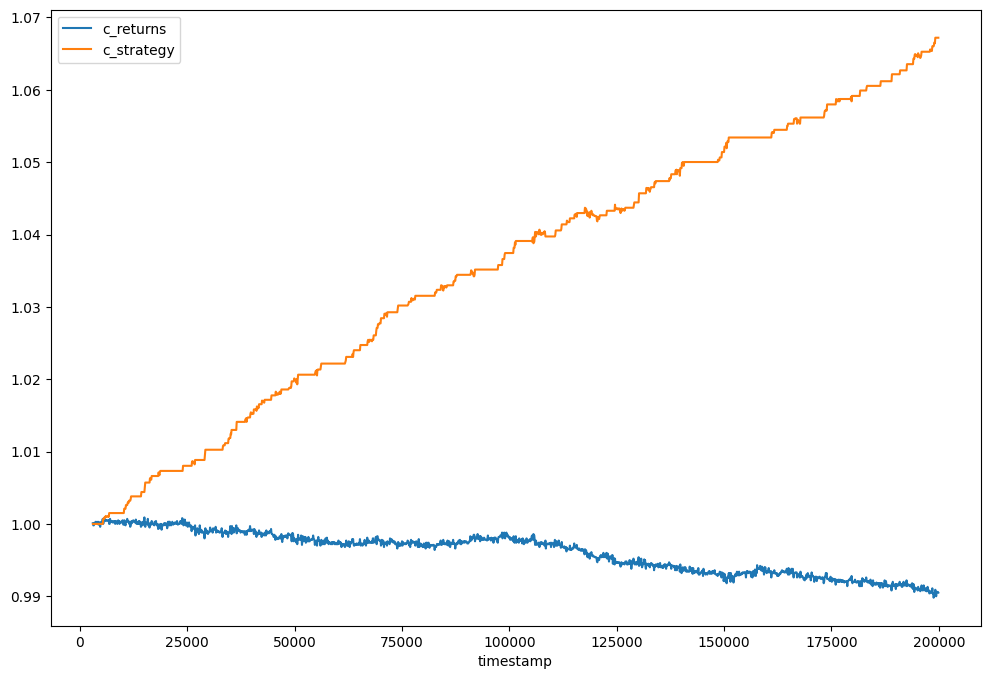

In [25]:
y[["c_returns", "c_strategy"]].plot(figsize = (12 , 8))

In [26]:
y

,mid_price_STARFRUIT,returns,SMA,Lower,Upper,distance,position,strategy,c_returns,c_strategy
timestamp,,,,,,,,,,
3000,5000.0,0.000100,4999.850000,4998.384300,5001.315700,0.150000,0.0,0.0,1.000100,1.000000
3100,4998.5,-0.000300,4999.800000,4998.255265,5001.344735,-1.300000,0.0,-0.0,0.999800,1.000000
3200,4998.5,0.000000,4999.750000,4998.136480,5001.363520,-1.250000,0.0,0.0,0.999800,1.000000
3300,4999.0,0.000100,4999.733333,4998.098933,5001.367734,-0.733333,0.0,0.0,0.999900,1.000000
3400,5000.0,0.000200,4999.783333,4998.214602,5001.352065,0.216667,0.0,0.0,1.000100,1.000000
...,...,...,...,...,...,...,...,...,...,...
199500,4952.5,0.000606,4952.600000,4949.043559,4956.156441,-0.100000,0.0,0.0,0.990599,1.067204
199600,4952.5,0.000000,4952.533333,4949.050040,4956.016627,-0.033333,0.0,0.0,0.990599,1.067204
199700,4952.5,0.000000,4952.450000,4949.093586,4955.806414,0.050000,0.0,0.0,0.990599,1.067204
